In [1]:
import requests
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timezone
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from google.cloud import bigquery
client = bigquery.Client()


In [2]:
sql="""  SELECT
    TIMESTAMP_TRUNC(date,
      DAY) AS date,
    year,
    COUNT(1) AS incidents
  FROM
    `bigquery-public-data.chicago_crime.crime`
  WHERE
    primary_type IN ('BATTERY',
      'ASSAULT')
    AND year BETWEEN 2014
    AND 2016
  GROUP BY
    date,
    year"""

df = client.query(sql).to_dataframe()
df.head()

,date,year,incidents
0,2014-08-31 00:00:00+00:00,2014,257
1,2014-06-07 00:00:00+00:00,2014,259
2,2014-07-13 00:00:00+00:00,2014,259
3,2014-05-25 00:00:00+00:00,2014,260
4,2014-08-03 00:00:00+00:00,2014,261


In [4]:
df['date']=pd.to_datetime(df['date'])
df.head()

,date,year,incidents
0,2014-08-31 00:00:00+00:00,2014,257
1,2014-06-07 00:00:00+00:00,2014,259
2,2014-07-13 00:00:00+00:00,2014,259
3,2014-05-25 00:00:00+00:00,2014,260
4,2014-08-03 00:00:00+00:00,2014,261


In [5]:
sql="""SELECT
    TIMESTAMP_TRUNC(TIMESTAMP(CONCAT(year, '-', mo, '-', da)),
      DAY) AS date,
    year,
    PERCENT_RANK() OVER (PARTITION BY year ORDER BY AVG(temp)) AS rank,
    AVG(temp) AS temperature
  FROM
    `bigquery-public-data.noaa_gsod.gsod*` AS w
  JOIN
    `bigquery-public-data.noaa_gsod.stations` AS s
  ON
    w.stn = s.usaf
    AND s.name = "CHICAGO O'HARE INTERNATIONAL"
  WHERE
    w._TABLE_SUFFIX BETWEEN '2014'
    AND '2016'
  GROUP BY
    date,
    year"""

weather_df = client.query(sql).to_dataframe()
weather_df.head()

,date,year,rank,temperature
0,2014-01-06 00:00:00+00:00,2014,0.000000,-7.7
1,2014-01-07 00:00:00+00:00,2014,0.002747,-7.3
2,2014-01-28 00:00:00+00:00,2014,0.005495,-5.2
3,2014-02-07 00:00:00+00:00,2014,0.008242,2.3
4,2014-01-08 00:00:00+00:00,2014,0.010989,2.7


In [6]:
merged_data = pd.merge(df, weather_df, left_on='date', right_on='date')
merged_data

,date,year_x,incidents,year_y,rank,temperature
0,2014-08-31 00:00:00+00:00,2014,257,2014,0.945055,76.2
1,2014-06-07 00:00:00+00:00,2014,259,2014,0.829670,71.1
2,2014-07-13 00:00:00+00:00,2014,259,2014,0.931319,75.8
3,2014-05-25 00:00:00+00:00,2014,260,2014,0.725275,66.2
4,2014-08-03 00:00:00+00:00,2014,261,2014,0.925824,75.4
5,2014-05-11 00:00:00+00:00,2014,261,2014,0.752747,67.2
6,2014-01-01 00:00:00+00:00,2014,263,2014,0.085165,15.8
7,2014-09-28 00:00:00+00:00,2014,264,2014,0.686813,64.9
8,2014-07-05 00:00:00+00:00,2014,264,2014,0.791209,69.2
9,2014-07-06 00:00:00+00:00,2014,266,2014,0.881868,73.0


Text(0.5,0,'Temperature')

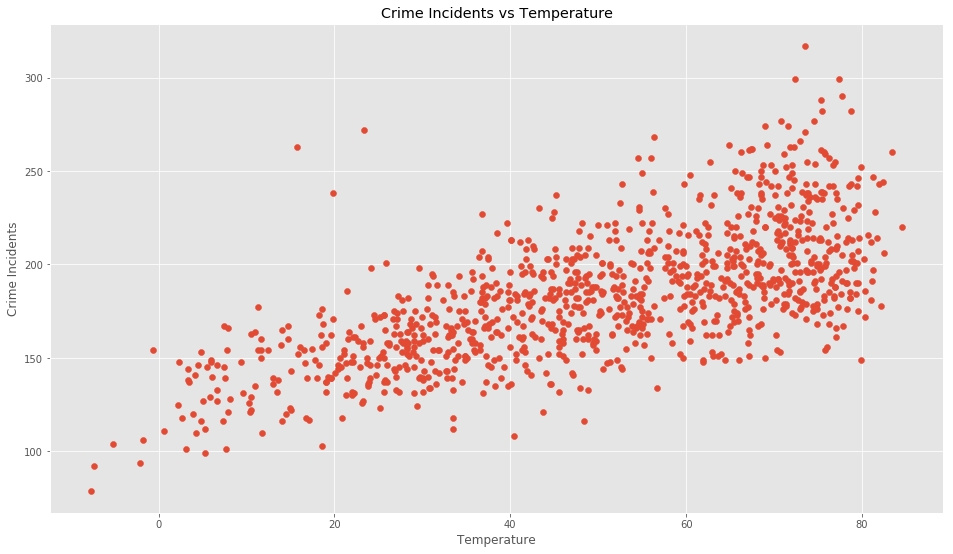

In [10]:
fig = plt.figure(figsize=(16,9))
plt.scatter(merged_data['temperature'],merged_data['incidents'])
plt.title('Crime Incidents vs Temperature')
plt.ylabel("Crime Incidents")
plt.xlabel("Temperature")